# Random Forest Regression

Objective: Prediction using Random Forest Regression  
Dataset: co2emi.csv

In [1]:
import pandas as pd
import numpy as np 
import seaborn as sns

import matplotlib.pyplot as plt
%matplotlib inline

data = pd.read_csv('co2emi.csv')
print(data.shape)
data.head()

(1067, 13)


,MODELYEAR,MAKE,MODEL,VEHICLECLASS,ENGINESIZE,CYLINDERS,TRANSMISSION,FUELTYPE,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
0,2014,ACURA,ILX,COMPACT,2.0,4,AS5,Z,9.9,6.7,8.5,33,196
1,2014,ACURA,ILX,COMPACT,2.4,4,M6,Z,11.2,7.7,9.6,29,221
2,2014,ACURA,ILX HYBRID,COMPACT,1.5,4,AV7,Z,6.0,5.8,5.9,48,136
3,2014,ACURA,MDX 4WD,SUV - SMALL,3.5,6,AS6,Z,12.7,9.1,11.1,25,255
4,2014,ACURA,RDX AWD,SUV - SMALL,3.5,6,AS6,Z,12.1,8.7,10.6,27,244


## Check Null

In [2]:
data.isnull().sum()

MODELYEAR                   0
MAKE                        0
MODEL                       0
VEHICLECLASS                0
ENGINESIZE                  0
CYLINDERS                   0
TRANSMISSION                0
FUELTYPE                    0
FUELCONSUMPTION_CITY        0
FUELCONSUMPTION_HWY         0
FUELCONSUMPTION_COMB        0
FUELCONSUMPTION_COMB_MPG    0
CO2EMISSIONS                0
dtype: int64

## Data Cleaning

In [3]:
data.drop(['MODELYEAR'],axis=1,inplace=True)

In [4]:
data.columns = ['Make','Model','Class','EngineSize','Cylinders','Transmission','FuelType','FC_City','FC_Hwy','FC_Avg','FC_Combine','CO2Emi']
data.head()

,Make,Model,Class,EngineSize,Cylinders,Transmission,FuelType,FC_City,FC_Hwy,FC_Avg,FC_Combine,CO2Emi
0,ACURA,ILX,COMPACT,2.0,4,AS5,Z,9.9,6.7,8.5,33,196
1,ACURA,ILX,COMPACT,2.4,4,M6,Z,11.2,7.7,9.6,29,221
2,ACURA,ILX HYBRID,COMPACT,1.5,4,AV7,Z,6.0,5.8,5.9,48,136
3,ACURA,MDX 4WD,SUV - SMALL,3.5,6,AS6,Z,12.7,9.1,11.1,25,255
4,ACURA,RDX AWD,SUV - SMALL,3.5,6,AS6,Z,12.1,8.7,10.6,27,244


## Data Exploration

X    514
Z    434
E     92
D     27
Name: FuelType, dtype: int64


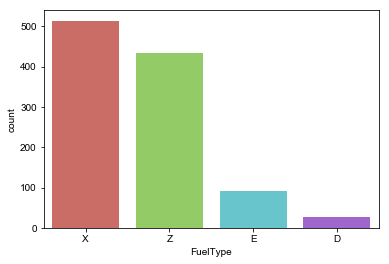

In [5]:
print(data['FuelType'].value_counts())

sns.countplot(x='FuelType',data = data, palette='hls',order = data['FuelType'].value_counts().index)
sns.set(rc={'figure.figsize':(8,8)})
plt.show()

## Convert Categorical to Numerical

In [6]:
data["Make"] = data["Make"].astype('category')
data["Make*"] = data["Make"].cat.codes      

data["Model"] = data["Model"].astype('category')
data["Model*"] = data["Model"].cat.codes  

data["Class"] = data["Class"].astype('category')
data["Class*"] = data["Class"].cat.codes  

data["Transmission"] = data["Transmission"].astype('category')
data["Transmission*"] = data["Transmission"].cat.codes  

data["FuelType"] = data["FuelType"].astype('category')
data["FuelType*"] = data["FuelType"].cat.codes  

data.head()

,Make,Model,Class,EngineSize,Cylinders,Transmission,FuelType,FC_City,FC_Hwy,FC_Avg,FC_Combine,CO2Emi,Make*,Model*,Class*,Transmission*,FuelType*
0,ACURA,ILX,COMPACT,2.0,4,AS5,Z,9.9,6.7,8.5,33,196,0,329,0,10,3
1,ACURA,ILX,COMPACT,2.4,4,M6,Z,11.2,7.7,9.6,29,221,0,329,0,20,3
2,ACURA,ILX HYBRID,COMPACT,1.5,4,AV7,Z,6.0,5.8,5.9,48,136,0,330,0,17,3
3,ACURA,MDX 4WD,SUV - SMALL,3.5,6,AS6,Z,12.7,9.1,11.1,25,255,0,389,11,11,3
4,ACURA,RDX AWD,SUV - SMALL,3.5,6,AS6,Z,12.1,8.7,10.6,27,244,0,483,11,11,3


## Correlation

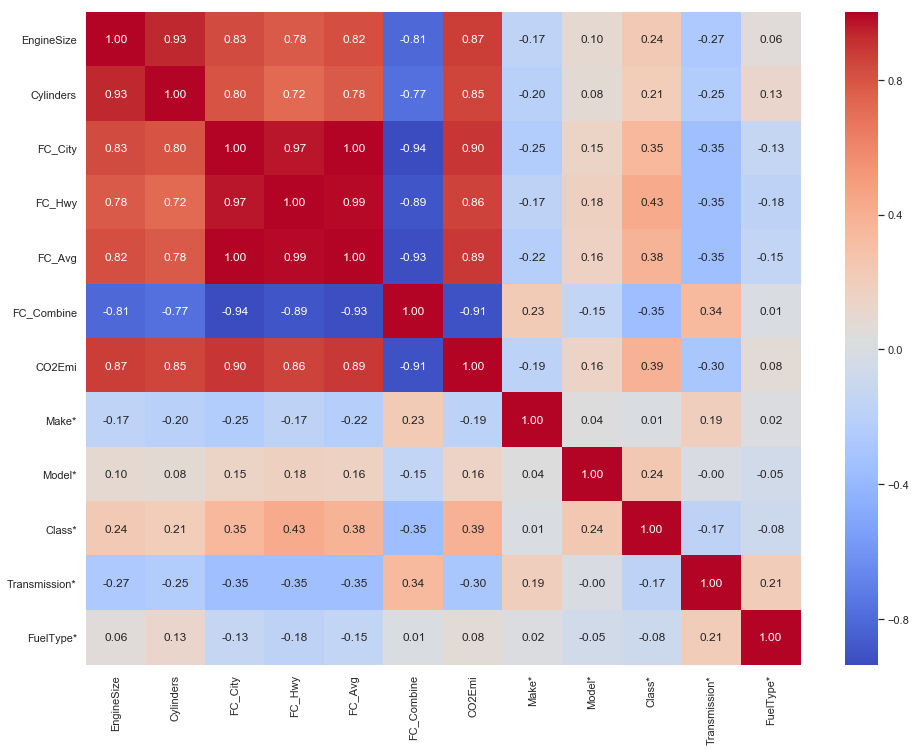

In [7]:
plt.figure(figsize=(16,12))
sns.heatmap(data=data.corr(),annot=True,fmt='.2f',cmap='coolwarm')
plt.show()

In [8]:
corr_rank = data.corr()
corr_rank["CO2Emi"].sort_values(ascending=False)

CO2Emi           1.000000
FC_City          0.898039
FC_Avg           0.892129
EngineSize       0.874154
FC_Hwy           0.861748
Cylinders        0.849685
Class*           0.388468
Model*           0.155492
FuelType*        0.075167
Make*           -0.186504
Transmission*   -0.299393
FC_Combine      -0.906394
Name: CO2Emi, dtype: float64

## Data Processing and Selection

In [9]:
X = data[['FC_City','FC_Avg','EngineSize','FC_Hwy','Cylinders','Class*','Model*','FuelType*',
          'Make*','Transmission*','FC_Combine']].values
print('Feature Dataset', X.shape)
X[0:2]

Feature Dataset (1067, 11)


array([[  9.9,   8.5,   2. ,   6.7,   4. ,   0. , 329. ,   3. ,   0. ,
         10. ,  33. ],
       [ 11.2,   9.6,   2.4,   7.7,   4. ,   0. , 329. ,   3. ,   0. ,
         20. ,  29. ]])

In [10]:
y = data[['CO2Emi']].values
print('Target Dataset', y.shape)
y[0:5]

Target Dataset (1067, 1)


array([[196],
       [221],
       [136],
       [255],
       [244]], dtype=int64)

## Data Normalization

In [11]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X)
X = scaler.transform(X)
print('Feature Dataset', X.shape)
X[0:2]

Feature Dataset (1067, 11)


array([[-0.82855772, -0.88430407, -0.9512918 , -0.99334135, -0.99896853,
        -1.24433431, -0.01068533,  1.01114784, -1.57545174,  0.04945969,
         0.87855306],
       [-0.5114328 , -0.5685715 , -0.66865251, -0.63532912, -0.99896853,
        -1.24433431, -0.01068533,  1.01114784, -1.57545174,  1.54870659,
         0.34273362]])

## Split Train Test

In [12]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

print("X TRAIN Set: ", X_train.shape, y_train.shape)
print("X TEST Set : ", X_test.shape, y_test.shape)

X TRAIN Set:  (853, 11) (853, 1)
X TEST Set :  (214, 11) (214, 1)


## Random Forest Regression

In [13]:
from sklearn.ensemble import RandomForestRegressor
regressor = RandomForestRegressor(n_estimators=200, random_state=0)  
regressor.fit(X_train, y_train)  
y_pred = regressor.predict(X_test) 

from sklearn import metrics
print("R-Square               :", round(metrics.r2_score(y_test, y_pred),4))
print('Mean Absolute Error    :', round(metrics.mean_absolute_error(y_test, y_pred),4))  
print('Mean Squared Error     :', round(metrics.mean_squared_error(y_test, y_pred),4))  
print('Root Mean Squared Error:', round(np.sqrt(metrics.mean_squared_error(y_test, y_pred)),4)) 
print("Accuracy score         :", round(regressor.score(X_test, y_test),4))

D:\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  This is separate from the ipykernel package so we can avoid doing imports until


R-Square               : 0.9866
Mean Absolute Error    : 1.3605
Mean Squared Error     : 54.4702
Root Mean Squared Error: 7.3804
Accuracy score         : 0.9866


## Random Forest Classifier

In [14]:
from sklearn.ensemble import RandomForestClassifier
model= RandomForestClassifier()
model.fit(X_train, y_train)  
predicted = model.predict(X_test)

print("R-Square               :", round(metrics.r2_score(y_test, predicted),4))
print('Mean Absolute Error    :', round(metrics.mean_absolute_error(y_test, predicted),4))  
print('Mean Squared Error     :', round(metrics.mean_squared_error(y_test, predicted),4))  
print('Root Mean Squared Error:', round(np.sqrt(metrics.mean_squared_error(y_test, predicted)),4))
print("Accuracy score         :", round(model.score(X_test, y_test),4))

R-Square               : 0.9917
Mean Absolute Error    : 2.0467
Mean Squared Error     : 33.7944
Root Mean Squared Error: 5.8133
Accuracy score         : 0.6449


D:\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
D:\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  This is separate from the ipykernel package so we can avoid doing imports until


## Data Prediction

In [15]:
df_pred1 = data[data.index == 2]
df_pred2 = data[data.index == 3]

df_pred = df_pred1.append(df_pred2)
df_pred.head()

,Make,Model,Class,EngineSize,Cylinders,Transmission,FuelType,FC_City,FC_Hwy,FC_Avg,FC_Combine,CO2Emi,Make*,Model*,Class*,Transmission*,FuelType*
2,ACURA,ILX HYBRID,COMPACT,1.5,4,AV7,Z,6.0,5.8,5.9,48,136,0,330,0,17,3
3,ACURA,MDX 4WD,SUV - SMALL,3.5,6,AS6,Z,12.7,9.1,11.1,25,255,0,389,11,11,3


In [16]:
Xp = df_pred[['FC_City','FC_Avg','EngineSize','FC_Hwy','Cylinders','Class*','Model*','FuelType*',
              'Make*','Transmission*','FC_Combine']].values
Xp = scaler.transform(Xp)

yp = df_pred[['CO2Emi']].values

## Prediction using RF Regressor

In [17]:
RFR_pred = regressor.predict(Xp)
RFR_pred

array([138.345, 254.99 ])

## Prediction using RF Classifier

In [18]:
RFC_pred = model.predict(Xp)
RFC_pred

array([126, 255], dtype=int64)